In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
path = r"https://drive.google.com/uc?export=download&id=13ZTYmL3E8S0nz-UKl4aaTZJaI3DVBGHM"
df  = pd.read_csv(path)

In [3]:
df.shape

(200, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [6]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

<Axes: >

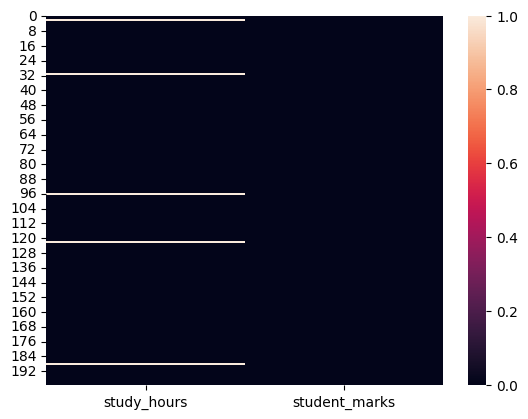

In [7]:
sns.heatmap(df.isnull())

In [8]:
df2=df.fillna(df.mean())

In [9]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [10]:
df.columns

Index(['study_hours', 'student_marks'], dtype='object')

In [11]:
df2.head(10)

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
5,7.550000,81.18
6,6.670000,76.99
7,8.990000,85.46
8,5.190000,70.66
9,6.750000,77.82


In [12]:
y=df2.drop(['study_hours'],axis="columns")
x=df2.drop(["student_marks"],axis="columns")

In [13]:
x

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000
...,...
195,7.530000
196,8.560000
197,8.940000
198,6.600000


In [14]:
y

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19
...,...
195,81.67
196,84.68
197,86.75
198,78.05


In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=51)

In [16]:
xtrain.shape,xtest.shape

((160, 1), (40, 1))

<Axes: xlabel='study_hours', ylabel='student_marks'>

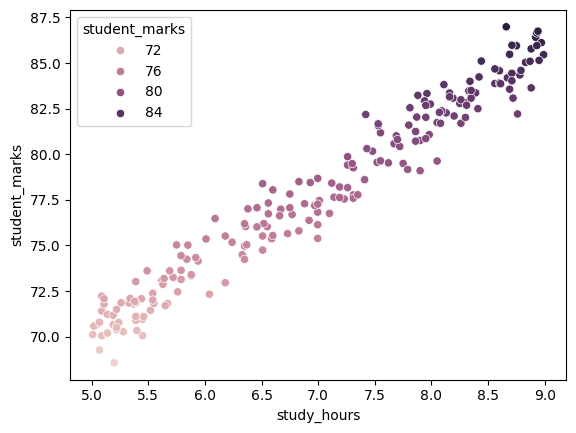

In [17]:
sns.scatterplot(x=df2['study_hours'],y=df2['student_marks'],data=df2,hue='student_marks')

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([[3.93571802]])

In [19]:
lr.intercept_

array([50.44735504])

In [20]:
# 
m=3.9
c=50.44
y=3.9*4+50.44
y

66.03999999999999

In [21]:
lr.predict([[4]])[0][0].round()

c:\users\chaw d vasant\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.0

In [22]:
y_pred=lr.predict(xtest)

In [23]:
new_df=pd.DataFrame(np.c_[xtest,ytest,y_pred],columns=['Study Hours','Student Marks','Student_predict _marks'])

In [24]:
new_df.head()

,Study Hours,Student Marks,Student_predict _marks
0,8.30,82.02,83.113815
1,7.23,77.55,78.902596
2,8.67,84.19,84.570030
3,8.99,85.46,85.829460
4,8.71,84.03,84.727459


In [25]:
lr.score(xtest,ytest)

0.9514124242154464

In [26]:
xtrain.shape

(160, 1)

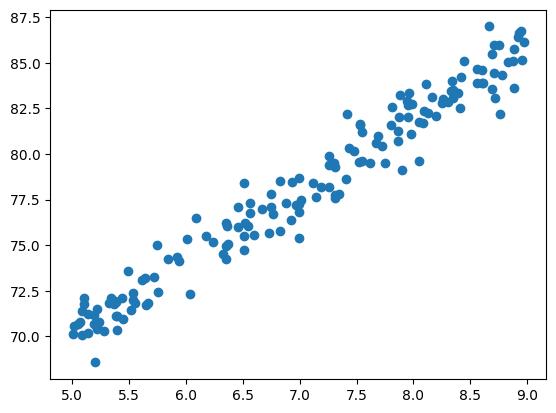

In [27]:
plt.scatter(xtrain,ytrain)

<Axes: xlabel='study_hours', ylabel='student_marks'>

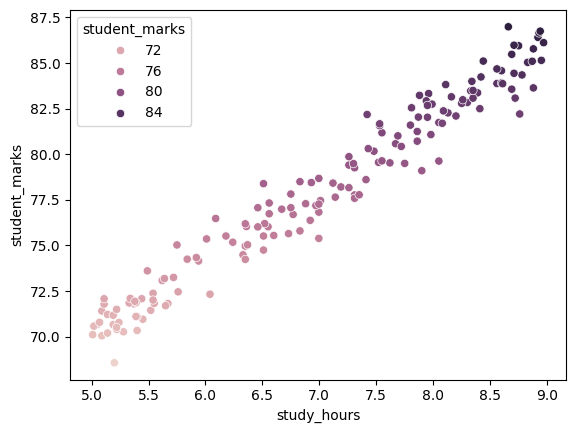

In [28]:
sns.scatterplot(x=xtrain['study_hours'],y=ytrain['student_marks'],data=df2,hue='student_marks')

<Axes: xlabel='study_hours', ylabel='student_marks'>

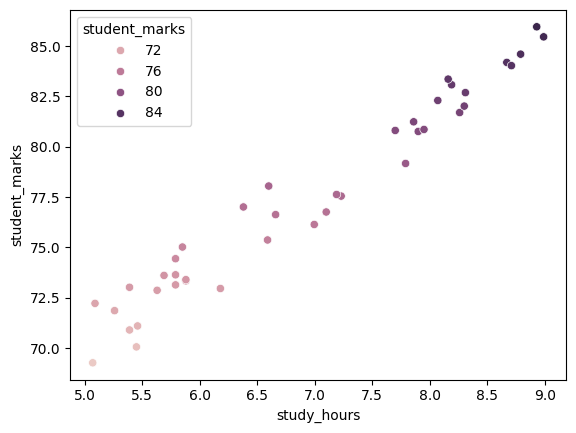

In [29]:
sns.scatterplot(x=xtest['study_hours'],y=ytest['student_marks'],data=df2,hue='student_marks')

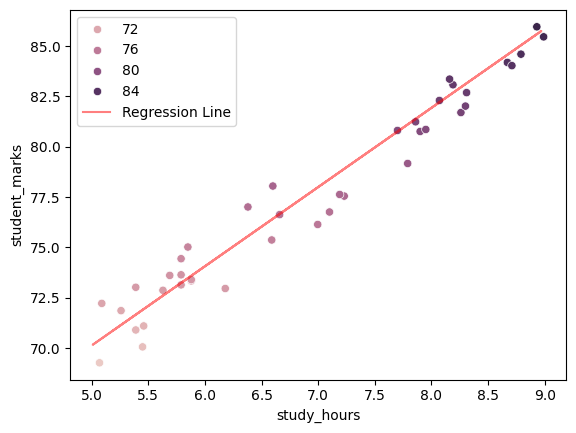

In [30]:
sns.scatterplot(x=xtest['study_hours'],y=ytest['student_marks'],hue='student_marks',data=df2)
plt.plot(xtrain,lr.predict(xtrain),color='red',alpha=0.5,label='Regression Line')
plt.legend()
plt.show()

In [31]:
import joblib as jb

In [32]:
jb.dump(lr,'Student_mark_predictor_model.pkl')

['Student_mark_predictor_model.pkl']

In [34]:
model=jb.load('Student_mark_predictor_model.pkl')
[model.predict([[5]])][0][0].round()

c:\users\chaw d vasant\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])